In [1]:
from matplotlib import pyplot as plt
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np

In [2]:
refugees_filepath = "../Dados/UKR_refugee_by_country.csv"

dados_refugiados = pd.read_csv(refugees_filepath)

dados_refugiados.describe()

,Unnamed: 0,individuals,centroid_lon,centroid_lat,lat_max,lon_max,lan_min,lon_min
count,665.000000,6.650000e+02,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,332.000000,8.494139e+05,24.487953,49.211109,54.523076,30.095398,45.195354,18.272863
std,192.113248,1.119566e+06,6.155674,2.624664,2.809159,4.210101,4.394629,6.745638
min,0.000000,3.410000e+02,12.999542,45.866700,49.019638,19.828251,38.866700,12.401300
25%,166.000000,2.754390e+05,19.413100,47.167200,52.866700,26.486400,41.706200,12.413100
50%,332.000000,4.423160e+05,25.300000,48.706200,55.469506,31.685303,45.044273,18.300000
75%,498.000000,7.415040e+05,28.464600,52.122400,55.706200,32.300000,48.021549,21.464600
max,664.000000,6.114787e+06,38.155608,53.538400,59.067055,40.355733,54.998769,34.812904


In [3]:
display(dados_refugiados)

,Unnamed: 0,id,country,date,individuals,centroid_lon,centroid_lat,lat_max,lon_max,lan_min,lon_min,source
0,0,Poland_2022-09-13,Poland,2022-09-13,6114787,19.401300,52.122400,55.469506,26.401300,48.021549,12.401300,"UNHCR, Government"
1,1,Russian Federation_2022-09-12,Russian Federation,2022-09-12,2593209,38.155608,51.488850,55.991456,40.355733,51.727742,34.812904,"UNHCR, Government"
2,2,Slovakia_2022-09-13,Slovakia,2022-09-13,778335,19.486400,48.706200,55.706200,26.486400,41.706200,12.486400,"UNHCR, Government"
3,3,Republic of Moldova_2022-09-10,Republic of Moldova,2022-09-10,606707,28.464600,47.197600,49.019638,31.685303,45.044273,25.068116,"UNHCR, Government"
4,4,Belarus_2022-09-11,Belarus,2022-09-11,16705,28.046300,53.538400,57.838934,33.727941,48.496894,21.046300,"UNHCR, Government"
...,...,...,...,...,...,...,...,...,...,...,...,...
660,660,Other European countries_2022-03-01,Other European countries,2022-03-01,69600,12.999542,49.284735,51.315890,19.828251,47.368175,14.696223,0
661,661,Slovakia_2022-03-01,Slovakia,2022-03-01,67000,19.486400,48.706200,55.706200,26.486400,41.706200,12.486400,0
662,662,Romania_2022-03-01,Romania,2022-03-01,44540,25.300000,45.866700,52.866700,32.300000,38.866700,18.300000,0
663,663,Russian Federation_2022-03-01,Russian Federation,2022-03-01,42900,38.155608,51.488850,59.067055,36.958298,54.998769,31.669526,0


In [4]:
dados_ref_stats = dados_refugiados.groupby('country').individuals.agg([len, min, max])

display(dados_ref_stats)

,len,min,max
country,,,
Belarus,76,341,27308
Hungary,106,116348,1381738
Other European countries,11,69600,304156
Poland,102,453982,6114787
Republic of Moldova,102,79315,606707
Romania,93,44540,1169027
Russian Federation,70,42900,2593209
Slovakia,105,67000,778335


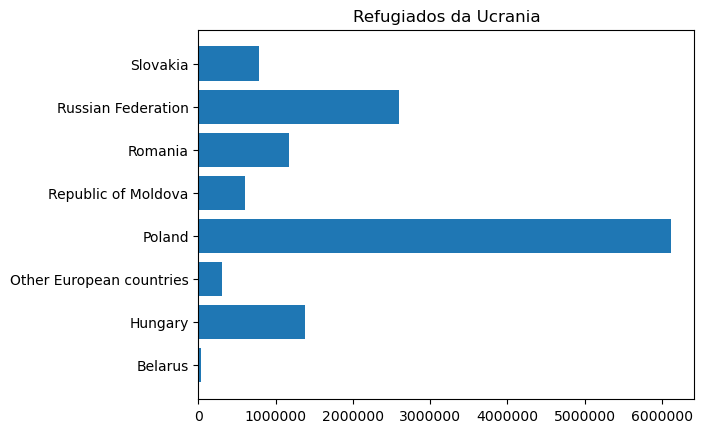

In [5]:
countries = dados_ref_stats.index.tolist()
max_by_country = dados_ref_stats['max'].tolist()

plt.ticklabel_format(style='plain')

plt.title("Refugiados da Ucrania")

plt.barh(countries, max_by_country)

plt.show()
